# Quadratic maps and bifurcations

We are going to study iterations of the map
$$
Q_c(x) := x^2 + c.
$$

In [1]:
def quadratic(c, x):
  return x**2 + c

## Imports and helpers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_system(ax, c, x0, n):
    ax.set_xlim(-2.1, 2.1)
    ax.set_ylim(-3, 3)
    ax.axhline(y=0, lw=1, color='k')
    ax.axvline(x=0, lw=1, color='k')

    q = lambda x: quadratic(c, x)
    
    t = np.linspace(-2.1, 2.1)
    ax.plot(t, q(t), 'b', lw=2)
    ax.plot(t, t, 'k:', lw=2)
    
    x, y = x0, q(x0)
    ax.plot([x0], [0], 'or', ms=5)
    ax.plot([x0, x0], [0, y], 'r', lw=1)
    for i in range(n):
        qy = q(y)
        ax.plot([x, y], [y, y], 'r', lw=1)
        ax.plot([y, y], [y, qy], 'r', lw=1)
        ax.plot([x], [y], 'or', ms=5)
        x, y = y, qy
    
    ax.set_title(f"$c={c:.1f}, \, x_0={x0:.1f}$")

## Main code

## Trajectories

You can do this also with desmos, see e.g. https://www.desmos.com/calculator/unan9xh0og for the Logistic Map case

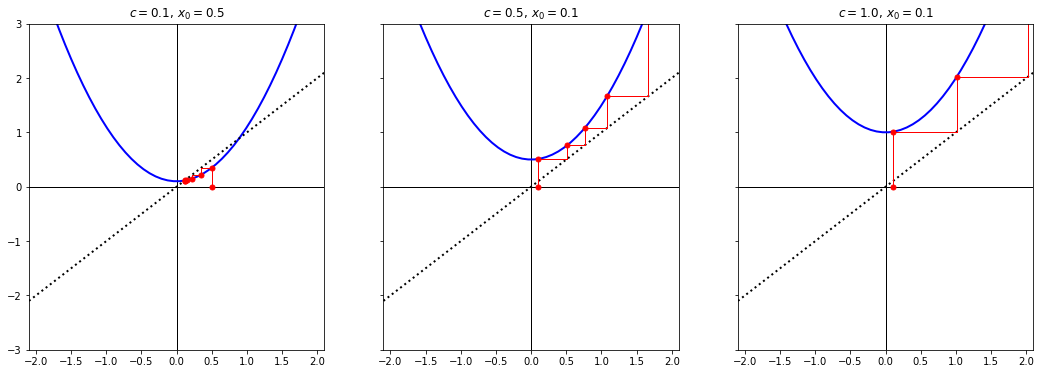

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
plot_system(ax1, 0.1, .5, 7)
plot_system(ax2, 0.5, .1, 5)
plot_system(ax3, 1, .1, 3)


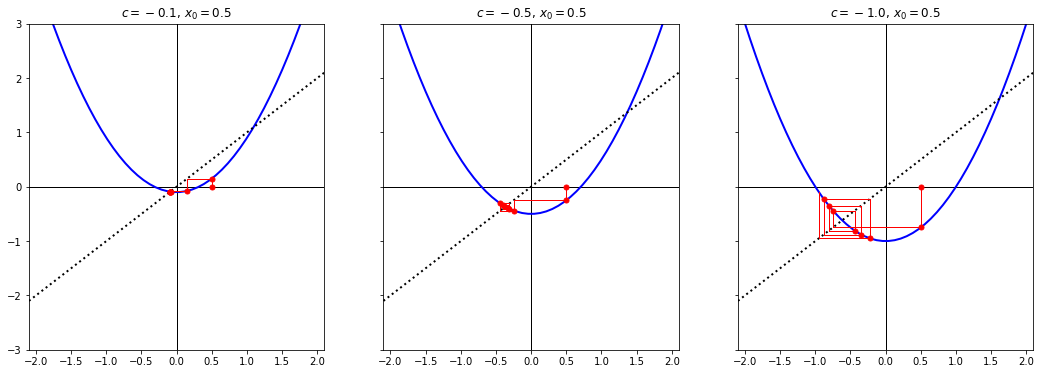

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
plot_system(ax1, -0.1, .5, 7)
plot_system(ax2, -0.5, .5, 7)
plot_system(ax3, -1, .5, 7)

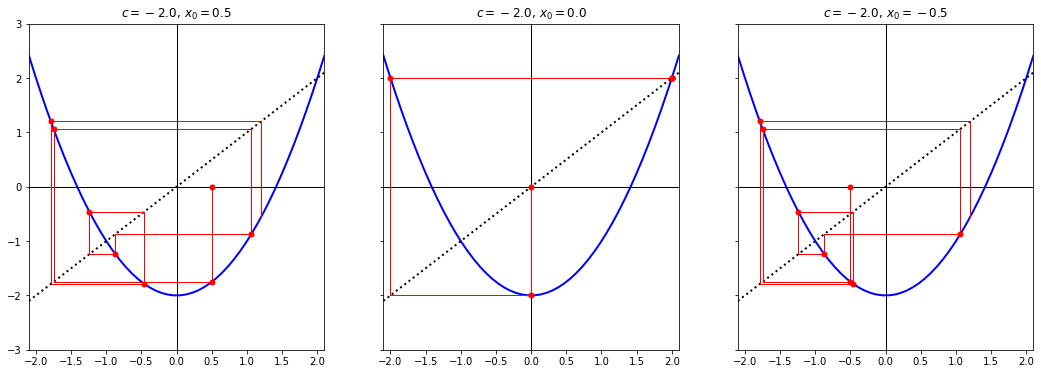

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
plot_system(ax1, -2, .5, 7)
plot_system(ax2, -2, 0, 7)
plot_system(ax3, -2, -.5, 7)

# Bifurcation diagram

From https://github.com/mseri/intro_to_python/blob/master/Lecture%203.ipynb, which in turns was an adaptation from the iPython cookbook book if my memory is not failing me.[link text](https://)

In [7]:
cpoints = 2000
cs = np.linspace(-2.5, 1.5, cpoints)

The trajectory is simply the set of points $x_{n+1} = Q_c(x_n)$, obtained iterating the function for a fixed value of $c$. We are going to simulate trajectories for $2000$ different values of $rc$, equispaced between $-2.5$ and $1.5$.

We will compute the trajectories for the first $1000$ iterations but plot the last $200$ elements (we consider the first 800 iterations a sort of warm-up, to give a chance to the system to reach a stability point). All the trajectories will start from $x_0 = 0.1$.

In [8]:
x_iterations = 1000
x_to_plot = 200

# np.ones(l) is the vector (1.0, 1.0, ..., 1.0) of length l
# numpy makes sure that we can multiply scalars and vectors
xs = 0.00001 * np.ones(cpoints)

Given that we are here, we will compute (an approximation) of the Lyapunov exponent for the various values of $rc$.
This is defined as
$$
\lambda(c) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^{n-1} \log\left| \frac{d Q_c}{dx}(x_i) \right|
$$
and charachterizes the rate of separation of infinitesimally close trajectories.

In [9]:
# we initialise lyapunov with zeroes (np.zeroes is like
# np.ones but the vector is the null one)
lyapunov_exps = np.zeros(cpoints)

<ipython-input-1-7c04610ff7cc>:2: RuntimeWarning: overflow encountered in square
  return x**2 + c
<ipython-input-10-403c7160b1a6>:21: RuntimeWarning: overflow encountered in multiply
  lyapunov_exps += np.log(abs(cs*(1-2*xs)))


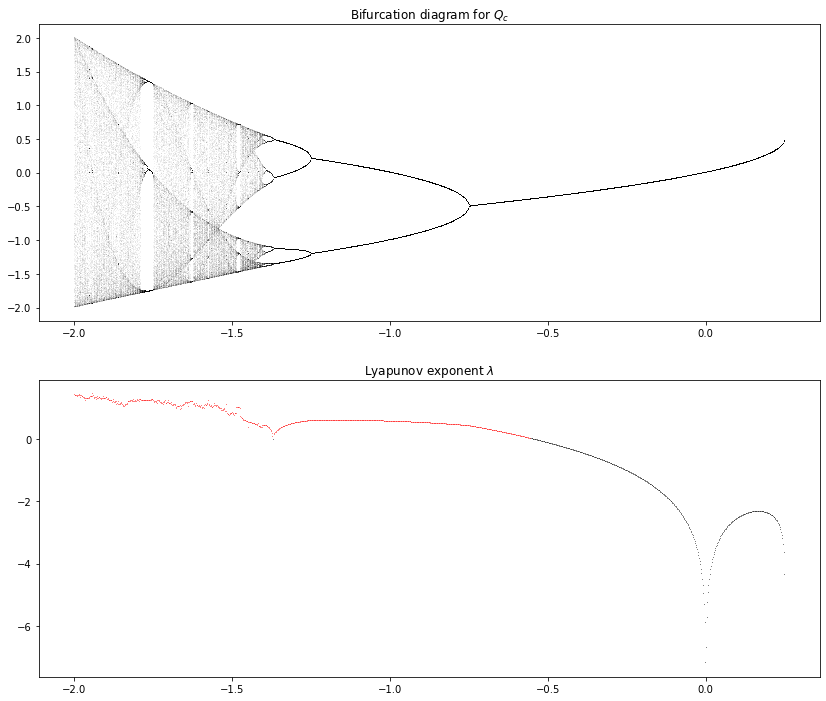

In [10]:
plt.figure(figsize=(14, 12))

plt.subplot(2,1,1) # you could also write 211: 2 rows, 1 column, 1st plot

# the limits here are not really necessary, try to comment them out and see how the plot changes
#plt.xlim(0.0, 4.0)
#plt.ylim(0.0, 1.0)

# yes, you can actually use latex in matplotlib labels!
plt.title("Bifurcation diagram for $Q_c$")

# we could make a function to compute the iterations for each r, reiterating each time
# however, numpy allows us to work on the full vector in a very fast way all at once
for i in range(x_iterations):
    
    # although we did nothing to make logistic work on vectors,
    # thanks to numpy it does and properly returns a vector!
    xs = quadratic(cs, xs)
    
    # meanwhile we compute the lyapunov exponent, we need to remember to scale it
    lyapunov_exps += np.log(abs(cs*(1-2*xs)))
    
    # if we have computed points on the tail that we want to plot,
    # let's plot them!
    if i >= (x_iterations - x_to_plot):
        plt.plot(cs, xs, color="black", marker=",", linestyle='', alpha=0.05)

# don't forget to divide the lyapunov expoby n
# we are doing it here to do it only once: it reduces the error and speeds up the code 
lyapunov_exps = lyapunov_exps/x_iterations

# we still have to plot the Lyapunov exponent
plt.subplot(2,1,2)
#plt.xlim(0.0, 4.0)
#plt.ylim(-2.0, 1.0)

plt.title("Lyapunov exponent $\lambda$")

# this dictionary contains the properties in common for the plot below
common_properties = {"marker":",", "linestyle":"", "alpha":0.5}

# we plot the points where the exponent is negative, notice how we are filtering them
# and notice how we are telling python to use the items in the `common_properties` dictionary
plt.plot(cs[lyapunov_exps<0], lyapunov_exps[lyapunov_exps<0], color="black",
         **common_properties)

# and we plot the points where the exponent is non negative in red
plt.plot(cs[lyapunov_exps>=0], lyapunov_exps[lyapunov_exps>=0], color="red", 
         **common_properties)

plt.show()